
--- Iris-setosa Statistics ---
             Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  50.00000       50.00000     50.000000      50.000000      50.00000
mean   25.50000        5.00600      3.418000       1.464000       0.24400
std    14.57738        0.35249      0.381024       0.173511       0.10721
min     1.00000        4.30000      2.300000       1.000000       0.10000
25%    13.25000        4.80000      3.125000       1.400000       0.20000
50%    25.50000        5.00000      3.400000       1.500000       0.20000
75%    37.75000        5.20000      3.675000       1.575000       0.30000
max    50.00000        5.80000      4.400000       1.900000       0.60000

--- Iris-versicolor Statistics ---
              Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count   50.00000      50.000000     50.000000      50.000000     50.000000
mean    75.50000       5.936000      2.770000       4.260000      1.326000
std     14.57738       0.516171      0.31

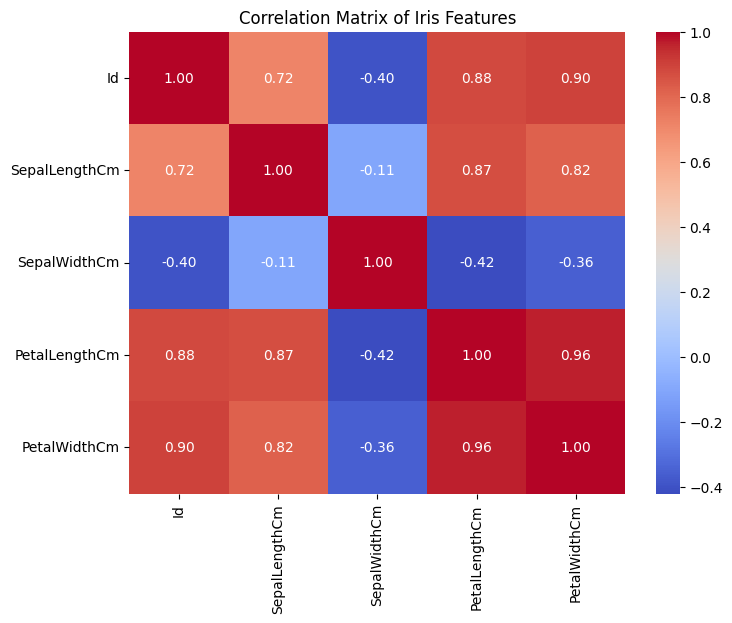

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load iris dataset
df = pd.read_csv("iris.csv")  # Ensure the file is in the current directory

# 2. Basic statistics by species
species_list = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

for species in species_list:
    print(f"\n--- {species} Statistics ---")
    species_df = df[df['Species'] == species]
    print(species_df.describe(percentiles=[.25, .5, .75]))

# 3. Measures of variability
def variability_stats(group):
    var_stats = {}
    for col in group.columns[:-1]:  # exclude 'Species'
        data = group[col]
        var_stats[col] = {
            'Range': data.max() - data.min(),
            'IQR': data.quantile(0.75) - data.quantile(0.25),
            'Variance': data.var(),
            'Standard Deviation': data.std()
        }
    return pd.DataFrame(var_stats)

print("\n--- Measures of Variability ---")
for species in species_list:
    print(f"\n{species}")
    print(variability_stats(df[df['Species'] == species]))

# 4. Correlation matrix & heatmap
print("\n--- Correlation Matrix ---")
corr_matrix = df.drop('Species', axis=1).corr()
print(corr_matrix)

# Heatmap visualization
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Iris Features")
plt.show()
